In [2]:
import numpy as np
from typing import Tuple
import networkx as nx

In [3]:
from tnestmodel.temp_fast_graph import SparseTempFastGraph, FastGraph, get_total_degree, TempFastGraph
from tnestmodel.visualization import draw_networkx_causal, draw_networkx_temp, to_color, draw_networkx_edges

In [4]:
edges0 = np.array([(0,1),[2,1]], dtype=np.uint32)
edges1 = np.array([[1,2], (2,3)], dtype=np.uint32)
edges2 = np.array([[2,3]], dtype=np.uint32)
edges3 = np.array([[0,1],[1,2], [2,0]], dtype=np.uint32)
G = SparseTempFastGraph([edges0.copy(), edges1.copy(), edges2, edges3, edges0], is_directed=False)
G2 = TempFastGraph([edges0.copy(), edges1.copy(), edges2, edges3, edges0], is_directed=False)

In [5]:
from numpy import array, int64
import matplotlib.pyplot as plt

In [6]:
G = SparseTempFastGraph.from_temporal_edges(np.array([[0, 2, 0],
       [3, 4, 0],
       [2, 4, 0],
       [1, 2, 1],
       [5, 4, 1],
       [0, 2, 1],
       [3, 4, 1],
       [1, 5, 2],
       [2, 4, 2]], dtype=int64),
                                        is_directed=False)
G = G.to_dense()


In [7]:
G_x = SparseTempFastGraph.from_temporal_edges(
    array([[0, 5, 0],
       [2, 3, 0],
       [1, 4, 0],
       [1, 3, 0],
       [4, 5, 0],
       [0, 2, 1],
       [0, 5, 1],
       [2, 3, 1],
       [1, 4, 1],
       [0, 5, 2],
       [2, 3, 2],
       [1, 4, 2],
       [1, 3, 2],
       [4, 5, 2]], dtype=int64), is_directed=False)
G_x = G_x.to_dense()


In [8]:
G2 = SparseTempFastGraph.from_temporal_edges(np.array([[0, 4, 0],
       [3, 2, 0],
       [2, 4, 0],
       [1, 2, 1],
       [5, 4, 1],
       [0, 4, 1],
       [2, 3, 1],
       [1, 2, 2],
       [4, 5, 2]], dtype=int64),
                                        is_directed=False)
G2 = G2.to_dense()

In [9]:
def get_other_graphs(G, depth, n_seeds):
    """Randomly searches through all graphs identically colored to the imput graph"""
    G = G.copy()
    G.apply_wl_colors_to_slices()
    graphs = set()
    for seed in range(n_seeds):
        G2 = G.copy()
        G2.apply_wl_colors_to_slices()
        G2.rewire(depth, method=1, seed=seed)
        
        edges = G2.to_temporal_edges()
        order = np.lexsort(edges)
        edges
        graph = tuple(tuple(x) for x in edges)
        if graph not in graphs:
            #print(seed)
            graphs.add(graph)
    return graphs

In [10]:
for depth in range(3):
    graphs = get_other_graphs(G, depth, 2000)
    print(len(graphs))
    if depth==2:
        for g in graphs:
            print(np.array(g, dtype=int))

758
36
36
[[0 4 0]
 [3 2 0]
 [2 4 0]
 [1 4 1]
 [5 2 1]
 [0 4 1]
 [3 2 1]
 [1 2 2]
 [4 5 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 4 1]
 [3 2 1]
 [4 5 2]
 [2 1 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 4 1]
 [3 2 1]
 [5 1 2]
 [2 4 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 4 1]
 [3 2 1]
 [5 4 2]
 [2 1 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 4 1]
 [3 2 1]
 [1 5 2]
 [4 2 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 4 1]
 [3 2 1]
 [1 5 2]
 [2 4 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 2 1]
 [3 4 1]
 [5 4 2]
 [2 1 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 2 1]
 [3 4 1]
 [4 5 2]
 [2 1 2]]
[[0 4 0]
 [3 2 0]
 [2 4 0]
 [1 4 1]
 [5 2 1]
 [0 2 1]
 [3 4 1]
 [1 2 2]
 [5 4 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 2 1]
 [3 4 1]
 [5 1 2]
 [2 4 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 4 1]
 [3 2 1]
 [1 2 2]
 [4 5 2]]
[[0 2 0]
 [3 4 0]
 [2 4 0]
 [1 2 1]
 [5 4 1]
 [0 2 1]
 [3 4 1]
 [1 5 2]
 [4 2 2]]
[[0 2 

In [11]:
len(graphs)

36

In [12]:
from nestmodel.visualization import get_familiy_node_colors_for_partition
def get_cmap(G, depth, strength=200):
    identifiers, partitions = G.get_all_partitions()
    nodes_to_colors = get_familiy_node_colors_for_partition(partitions, depth, strength)
    return {a : b for a,b in zip(partitions[depth, :], nodes_to_colors)}

In [13]:
get_cmap(G, 0)

{0: 'gray'}

In [14]:
get_cmap(G, 1)

{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}

In [15]:
#get_familiy_node_colors_for_partition(partitions, 0, 100)

In [26]:
def plot(G, colors=None, prefix="base", colormap=None, save=False):
    transpose=False
    if transpose:
        plt.figure(figsize=(5,2.75))
    else:
        plt.figure(figsize=(2.75,5))
        pass
        
    draw_networkx_temp(G, transpose=transpose, colors=colors, colormap=colormap, connectionstyle="arc3,rad=0.27", width=2.0)
    plt.box(False)
    if colors is None:
        colors=0
        
    if transpose:
        a, b = plt.gca().get_ylim()
        
        plt.ylim(a-0.5, b+0.2)
    else:
        a, b = plt.gca().get_xlim()
        plt.xlim(a-0.5, b+0.3)
    #if save:
    plt.xlim(-0.61, 2.6)
    plt.ylim(-0.525, 5.525)
        
    print(plt.gca().get_ylim(), plt.gca().get_xlim())
    if save:
        plt.savefig(f"./Figure1/{prefix}_{colors}.pdf", transparent=True, bbox_inches="tight")
        plt.savefig(f"./Figure1/{prefix}_{colors}.svg", transparent=True, bbox_inches="tight")
        plt.savefig(f"./Figure1/{prefix}_{colors}.png", transparent=True, bbox_inches="tight", dpi=600)

(-0.525, 5.525) (-0.61, 2.6)


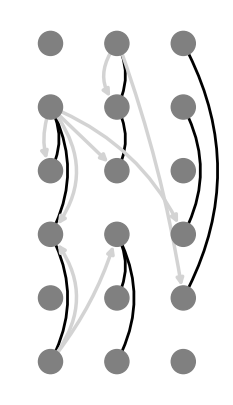

(-0.525, 5.525) (-0.61, 2.6)


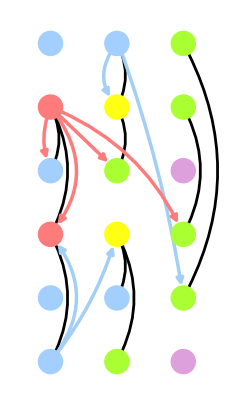

(-0.525, 5.525) (-0.61, 2.6)


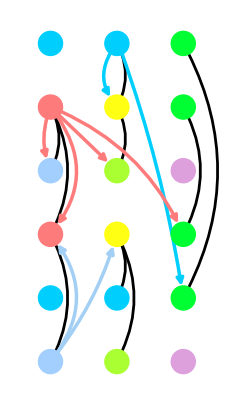

In [30]:
for depth in range(3):
    plot(G, colors = depth, colormap=get_cmap(G, depth), save=False)
    edge_color = ["lightgray", "#a2cff3", "#a2cff3"][depth] # blues
    width=2.5
    draw_networkx_edges([(0,0)], (2,0), edge_color=edge_color, connectionstyle="arc3,rad=0.4", width=width)
    draw_networkx_edges((0,0), (2,1), edge_color=edge_color, connectionstyle="arc3,rad=0.1", width=width)

    # draw_networkx_edges([(5,0)], (4,1), edge_color=edge_color, connectionstyle="arc3,rad=-0.01", width=width)
    # draw_networkx_edges((5,0), (1,2), edge_color=edge_color, connectionstyle="arc3,rad=-0.1", width=width)

    edge_color = ["lightgray", "#a2cff3", "#00cffe"][depth] # blues
    # # node (5,1)
    draw_networkx_edges((5,1), (4,1), edge_color=edge_color, connectionstyle="arc3,rad=0.4", width=width)
    draw_networkx_edges((5,1), (1,2), edge_color=edge_color, connectionstyle="arc3,rad=-0.05", width=width, delta=(0.005,0.05) )
    
    edge_color = ["lightgray", "#fe7b7cff", "#fe7b7cff"][depth]

    # bottom left node
    draw_networkx_edges((4,0), (3,1), edge_color=edge_color, connectionstyle="arc3,rad=-0.001", width=width)
    draw_networkx_edges((4,0), (2,0), edge_color=edge_color, connectionstyle="arc3,rad=-0.4", width=width)
    draw_networkx_edges((4,0), (2,2), edge_color=edge_color, connectionstyle="arc3,rad=-0.2", width=width)
    draw_networkx_edges((4,0), (3,0), edge_color=edge_color, connectionstyle="arc3,rad=0.2", width=width)


    
    
    
    plt.savefig(f"./Figure1/arrows_{depth}.pdf", transparent=True, bbox_inches="tight")
    plt.savefig(f"./Figure1/arrows_{depth}.svg", transparent=True, bbox_inches="tight")
    plt.savefig(f"./Figure1/arrows_{depth}.png", transparent=True, bbox_inches="tight", dpi=600)
    plt.show()

{0: 'gray'}
{0: 'gray'}
{0: 'gray'}


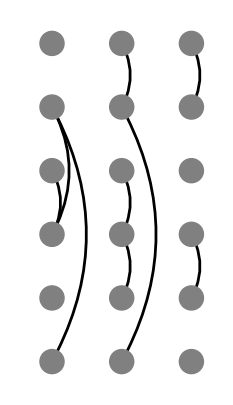

{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}


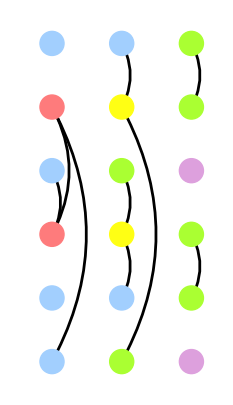

{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}


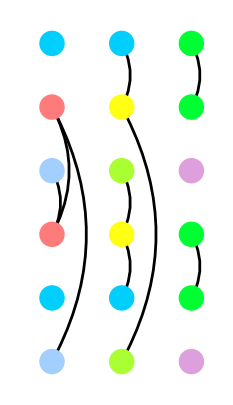

In [17]:
for depth in range(3):
    plot(G2, colors = depth, colormap=get_cmap(G, depth), prefix="/other/", save=True)
    plt.show()

{0: 'gray'}
{0: 'gray'}
{0: 'gray'}


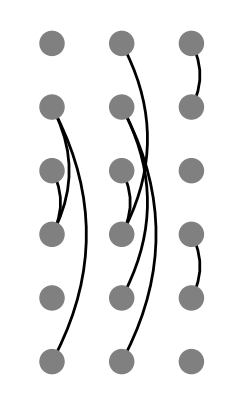

{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}


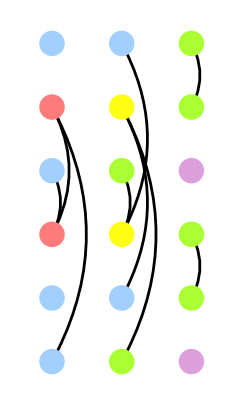

{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}


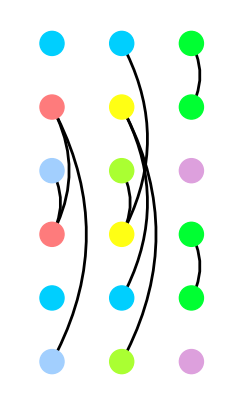

{0: 'gray'}
{0: 'gray'}
{0: 'gray'}


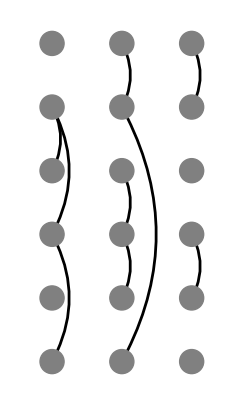

{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}


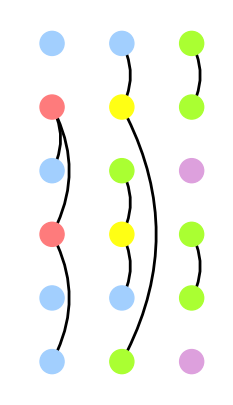

{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}


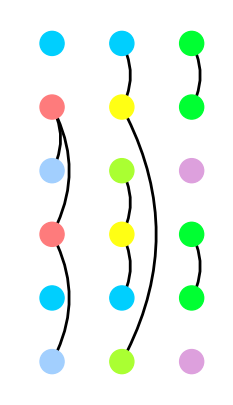

{0: 'gray'}
{0: 'gray'}
{0: 'gray'}


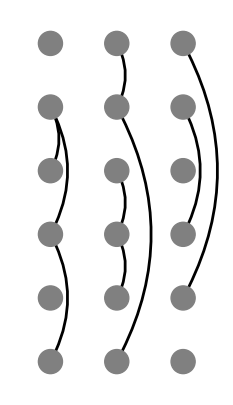

{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}


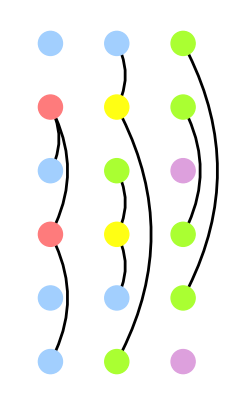

{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}


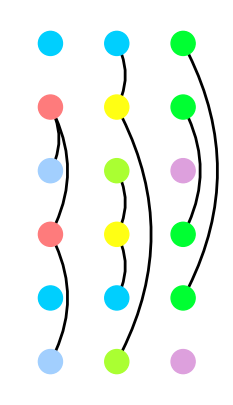

{0: 'gray'}
{0: 'gray'}
{0: 'gray'}


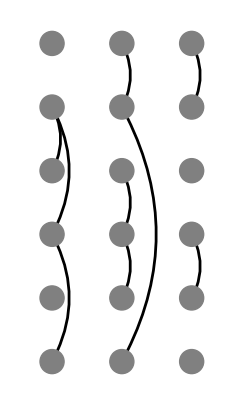

{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}


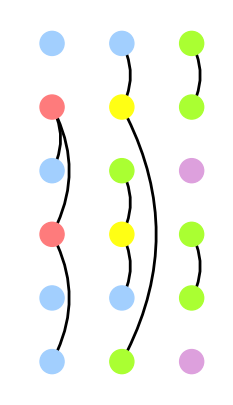

{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}
{0: '#a2cffe', 1: '#00cffe', 2: '#fe7b7c', 3: '#aaff32', 4: '#ffff14', 5: '#DDA0DD', 6: '#00ff32'}


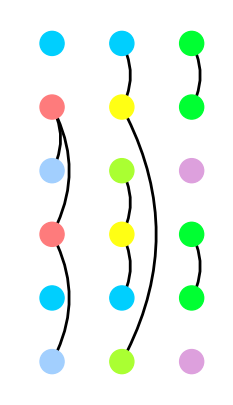

{0: 'gray'}
{0: 'gray'}
{0: 'gray'}


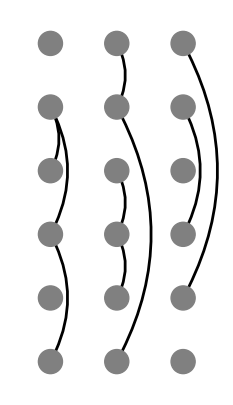

{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}
{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}


KeyboardInterrupt: 

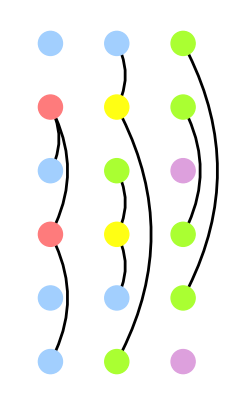

In [18]:
depth = 1
graphs = get_other_graphs(G, depth, 100)
for i, g in enumerate(graphs):
    new_G = SparseTempFastGraph.from_temporal_edges(np.array(g, dtype=int), is_directed=False).to_dense()
    for color_depth in range(3):
        plot(new_G, colors = color_depth, colormap=get_cmap(new_G, color_depth), prefix=f"/other/{depth}_{i}", save=True)
        plt.show()
    if i> 10:
        break


In [ ]:
np.array((1,2)).shape

In [ ]:
draw_networkx_temp(G, colors = 1)

In [ ]:
draw_networkx_temp(G, colors = 1)

In [ ]:
draw_networkx_causal(G.get_sparse_causal_completion(), colors=1)

In [ ]:
from tnestmodel.visualization import to_color
import networkx as nx

In [ ]:
draw_networkx_causal(G2.get_causal_completion(), labels=False, colors=1)

In [ ]:
edges0 = np.array([[0,1], [1,2]], dtype=np.uint32)
edges1 = np.array([[1,2]], dtype=np.uint32)
edges2 = np.array([[0,1], [1,2]], dtype=np.uint32)
edges3 = np.array([[0,1]], dtype=np.uint32)
G3 = SparseTempFastGraph([edges0, edges1, edges2, edges3, edges1], is_directed=True)
G3_d = TempFastGraph([edges0, edges1, edges2, edges3, edges1], is_directed=True)

In [ ]:
draw_networkx_temp(G3)

In [ ]:
draw_networkx_causal(G3.get_sparse_causal_completion())

In [ ]:
draw_networkx_causal(G3.get_sparse_causal_completion(), labels=True)

In [ ]:
G3_d.r = 2
draw_networkx_causal(G3_d.get_restless_causal_completion(), labels=False)

In [ ]:
G3_d.r = 3
draw_networkx_causal(G3_d.get_restless_causal_completion(), labels=False)